In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

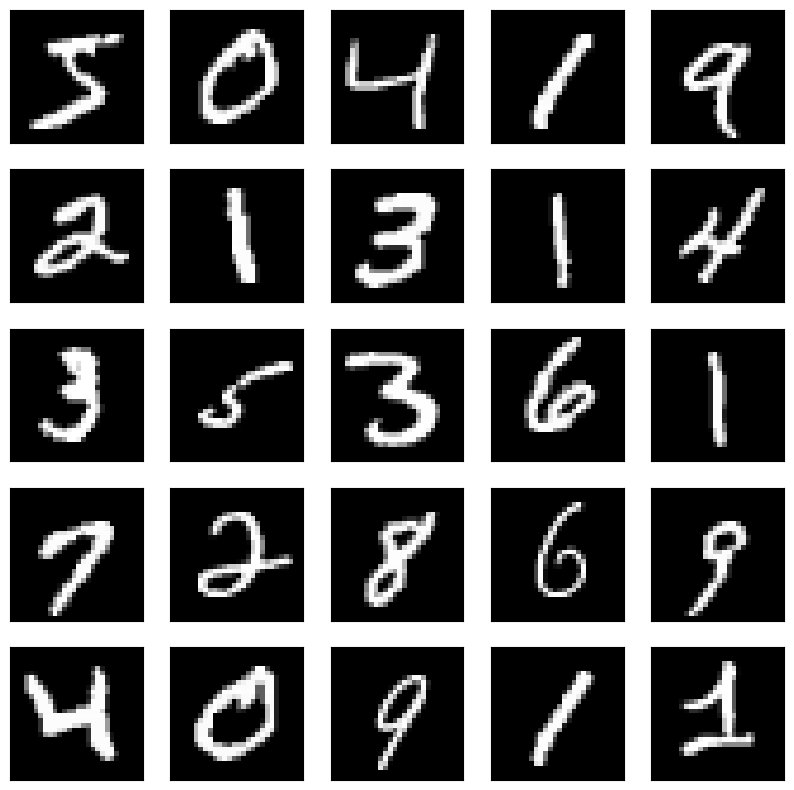

{np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}


In [3]:
#Visualizing a sample 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
plt.show()

#Checking class distribution
unique,counts=np.unique(y_train,return_counts=True)
print(dict(zip(unique,counts)))

In [4]:
#Data Preprocessing
#Normalizing pixel values
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#Reshaping data to add channel dimension
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

#converting labels into one_hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
#Data Augmentation
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [6]:
#Building CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


c:\Users\renju\OneDrive\Desktop\Image_classification\imgenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compiling the Model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
      metrics=['accuracy']
    )

In [8]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True,verbose=1)

#Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

#Training the model with validation data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    verbose=2,
    callbacks=[early_stopping]
)

x_train shape: (48000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)
y_train shape: (48000, 10)
y_val shape: (12000, 10)
Epoch 1/50


c:\Users\renju\OneDrive\Desktop\Image_classification\imgenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 - 27s - 18ms/step - accuracy: 0.8174 - loss: 0.5670 - val_accuracy: 0.9703 - val_loss: 0.0916
Epoch 2/50
1500/1500 - 37s - 25ms/step - accuracy: 0.9284 - loss: 0.2381 - val_accuracy: 0.9849 - val_loss: 0.0493
Epoch 3/50
1500/1500 - 18s - 12ms/step - accuracy: 0.9448 - loss: 0.1817 - val_accuracy: 0.9858 - val_loss: 0.0434
Epoch 4/50
1500/1500 - 20s - 13ms/step - accuracy: 0.9529 - loss: 0.1552 - val_accuracy: 0.9880 - val_loss: 0.0376
Epoch 5/50
1500/1500 - 25s - 17ms/step - accuracy: 0.9580 - loss: 0.1417 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 6/50
1500/1500 - 27s - 18ms/step - accuracy: 0.9628 - loss: 0.1267 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 7/50
1500/1500 - 31s - 21ms/step - accuracy: 0.9638 - loss: 0.1182 - val_accuracy: 0.9902 - val_loss: 0.0317
Epoch 8/50
1500/1500 - 29s - 19ms/step - accuracy: 0.9670 - loss: 0.1143 - val_accuracy: 0.9916 - val_loss: 0.0285
Epoch 9/50
1500/1500 - 21s - 14ms/step - accuracy: 0.9685 - loss: 0.1049 - val_accuracy: 0.

In [9]:
#Evaluating the model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#Evaluating the model
y_pred_prob = model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

#Calculating evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

313/313 - 1s - 4ms/step - accuracy: 0.9935 - loss: 0.0172
Test Accuracy: 99.35%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9935
Precision: 0.9935128932057805
Recall: 0.9935
F1-score: 0.993499650141766


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



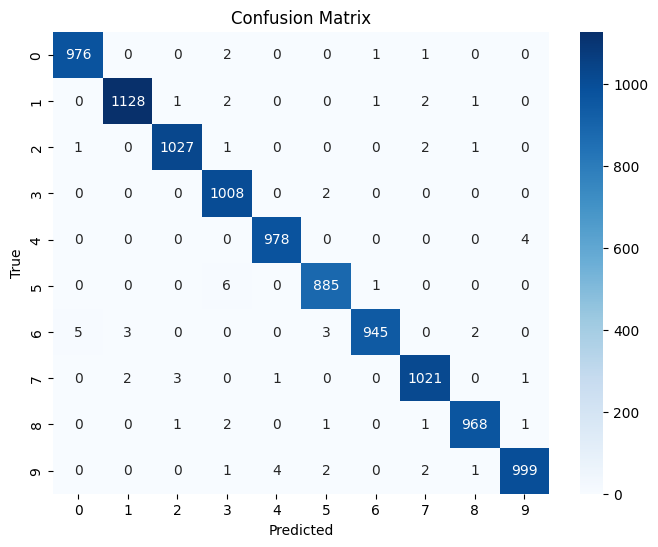

In [10]:
#Print classification report
print(classification_report(y_true, y_pred))

#Ploting confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

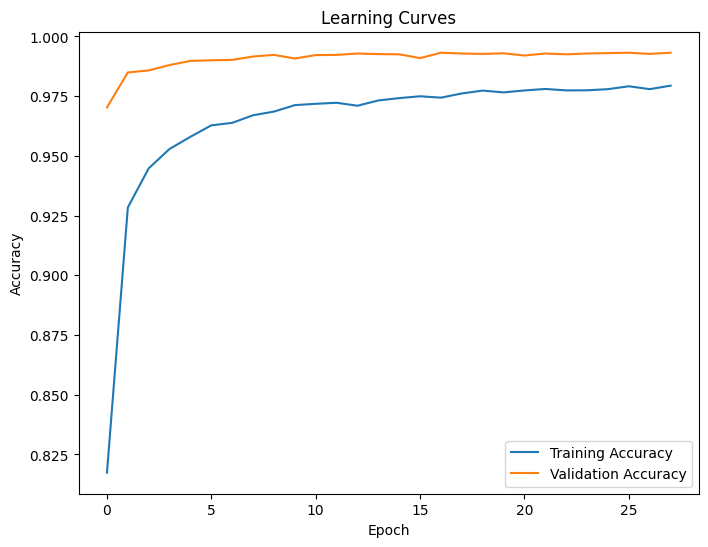

In [11]:
# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

In [12]:
#saving the model
model.save('imageanalyzer_cnn_model.h5')